In [1]:
import requests
import pandas as pd
import sqlite3

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pylab import rcParams

In [2]:
data = pd.read_excel("BAZA_1.xlsx")
data.head(5)

,Unnamed: 0,errcode,data.id,data.pdId,data.developer.devId,data.developer.devShortCleanNm,data.developer.devShortNm,data.developer.devFullCleanNm,data.developer.problObjCnt,data.developer.buildObjCnt,...,data.developer.bankruptStage.bankruptStageDesc,data.developer.bankruptStage.bankruptLawUrl,data.developer.orgBankruptMsgDttm,data.metro.id,data.metro.name,data.metro.line,data.metro.color,data.metro.time,data.metro.isWalk,data.metro.colors
0,0,0,13383,28105,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,13391,28101,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0,13397,28141,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0,13398,28141,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0,13399,28141,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape

(10551, 110)

In [4]:
data = data[['data.developer.devShortCleanNm', 'data.developer.regRegionDesc', 'data.objReady100PercDt', 'data.objElemParkingCnt', 'data.objSquareLiving', 'data.objFlatCnt', 'data.objFloorCnt', 'data.objPriceAvg']]

In [5]:
data.dtypes



data.developer.devShortCleanNm     object
data.developer.regRegionDesc       object
data.objReady100PercDt             object
data.objElemParkingCnt              int64
data.objSquareLiving              float64
data.objFlatCnt                     int64
data.objFloorCnt                    int64
data.objPriceAvg                  float64
dtype: object

In [6]:
data.isnull().sum(axis=0)


data.developer.devShortCleanNm       0
data.developer.regRegionDesc       120
data.objReady100PercDt               0
data.objElemParkingCnt               0
data.objSquareLiving                 0
data.objFlatCnt                      0
data.objFloorCnt                     0
data.objPriceAvg                  2973
dtype: int64

In [7]:
data.describe()


,data.objElemParkingCnt,data.objSquareLiving,data.objFlatCnt,data.objFloorCnt,data.objPriceAvg
count,10551.000000,10551.000000,10551.000000,10551.000000,7.578000e+03
mean,36.538148,9450.524498,190.064449,12.510283,1.119123e+05
std,115.970637,11411.724574,235.849154,8.421304,1.106912e+05
min,0.000000,0.000000,0.000000,0.000000,1.000000e+03
25%,0.000000,2103.095000,40.000000,5.000000,6.206300e+04
50%,0.000000,6465.000000,124.000000,11.000000,8.551750e+04
75%,0.000000,12493.555000,254.000000,18.000000,1.270970e+05
max,3580.000000,142978.700000,2676.000000,76.000000,2.724549e+06


Средний чек за квадратный метр в регионах

In [8]:
data_mean_price = data.dropna(subset=['data.objPriceAvg','data.developer.regRegionDesc','data.objReady100PercDt'])
mean_price_region = data.groupby('data.developer.regRegionDesc').mean()
mean_price_region = mean_price_region.sort_values(by='data.objPriceAvg')
mean_price_region = mean_price_region['data.objPriceAvg']
mean_price_region.head(10)

data.developer.regRegionDesc
Мурманская область                     20442.000000
Дагестан Республика                    30793.933333
Чеченская Республика                   32742.333333
Северная Осетия - Алания Республика    43500.117647
Кабардино-Балкарская Республика        48194.600000
Костромская область                    48384.847826
Калмыкия Республика                    50352.900000
Псковская область                      51190.592593
Смоленская область                     52899.098361
Тамбовская область                     53846.750000
Name: data.objPriceAvg, dtype: float64

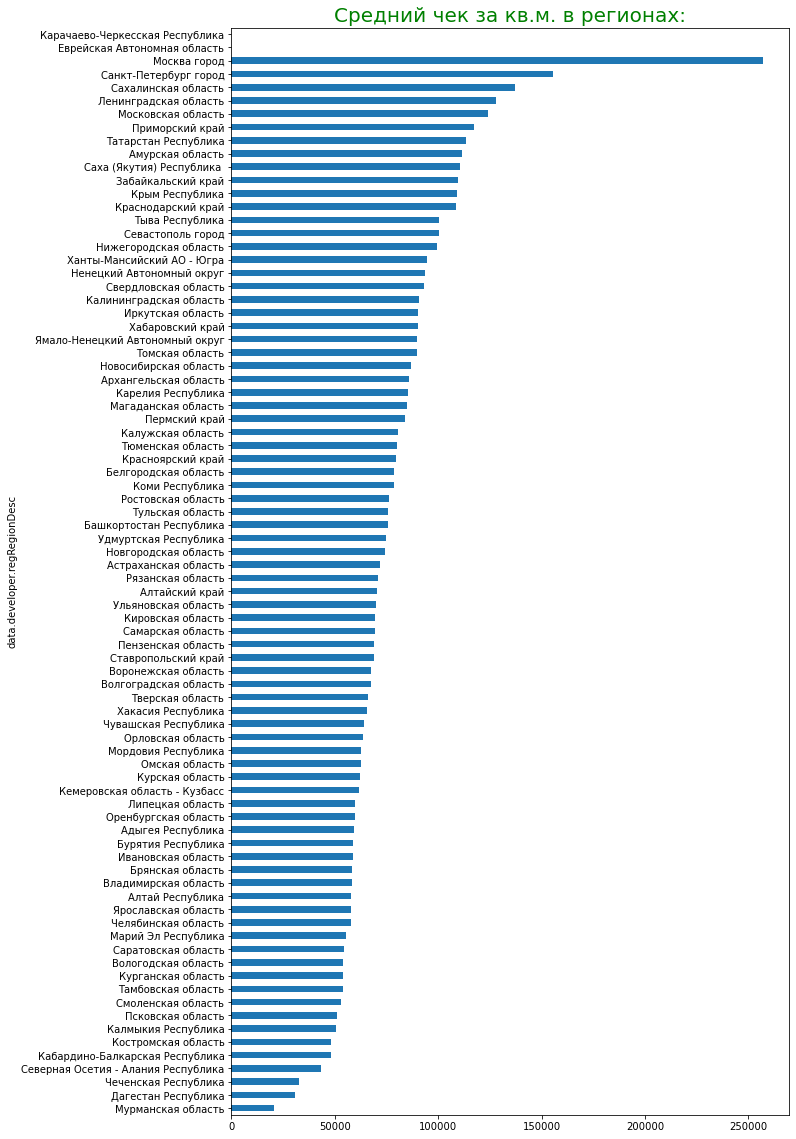

In [9]:
rcParams['figure.figsize'] = 10,20
mean_price_region.plot(kind='barh')
plt.title('Средний чек за кв.м. в регионах:', size=20, color='g');
plt.show()

По графику видно, что если не брать в расчет Карачаево - Черкесская Республика и Еврейская автономная область, то средний чек за кв.м. с большим отклонением от всех в г. Москва примерно 250т.р. за кв.м.

In [27]:
date = []
for i in data['data.objReady100PercDt']:
    if i not in date:
        date.append(i)

In [36]:
count_years = data.groupby(['data.developer.regRegionDesc','data.objReady100PercDt']).count()
count_years = count_years.sort_values(by='data.objReady100PercDt')
count_years.head(5)

,,data.developer.devShortCleanNm,data.objElemParkingCnt,data.objSquareLiving,data.objFlatCnt,data.objFloorCnt,data.objPriceAvg
data.developer.regRegionDesc,data.objReady100PercDt,,,,,,
Краснодарский край,2017-09-30,1,1,1,1,1,1
Московская область,2017-12-31,3,3,3,3,3,0
Тюменская область,2018-09-30,1,1,1,1,1,1
Пермский край,2018-12-31,1,1,1,1,1,0
Новосибирская область,2019-06-30,1,1,1,1,1,0


In [50]:
count_years_data = count_years['data.developer.devShortCleanNm']
count_years_data.head(10)

data.developer.regRegionDesc     data.objReady100PercDt
Краснодарский край               2017-09-30                 1
Московская область               2017-12-31                 3
Тюменская область                2018-09-30                 1
Пермский край                    2018-12-31                 1
Новосибирская область            2019-06-30                 1
Красноярский край                2019-12-31                 1
Ямало-Ненецкий Автономный округ  2020-03-31                 2
Москва город                     2020-03-31                 4
Новосибирская область            2020-12-31                12
Московская область               2020-12-31                 1
Name: data.developer.devShortCleanNm, dtype: int64

Text(0.5, 1.0, 'Объемы вводимого жилья по годам:')

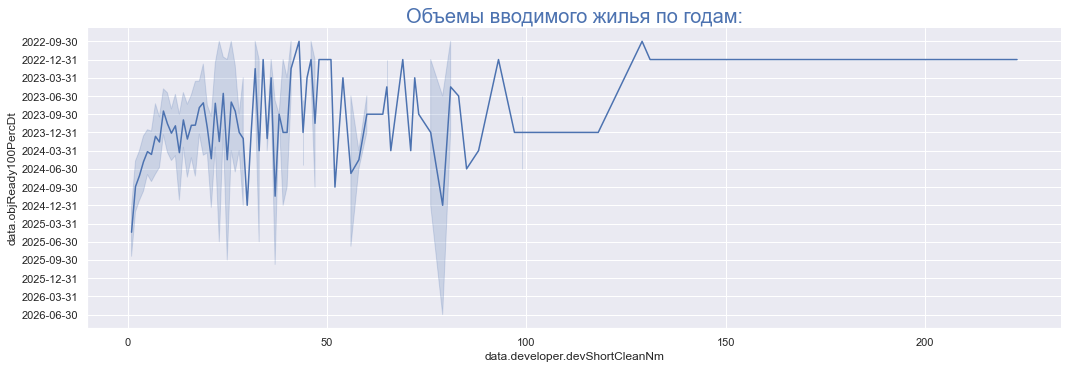

In [53]:
sns.set(style='darkgrid')  

sns.relplot(
    x='data.developer.devShortCleanNm',
    y='data.objReady100PercDt', 
    data=count_years,
    kind='line',
    aspect=3
)
plt.title('Объемы вводимого жилья по годам:', size=20, color='b')

Самые большие объемы вводимого жилья прогнозируются в период с 2022г. по 2024г., а пик планируется на конец 2023г.